In [54]:
# Librer√≠as
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import html, dcc, Output, Input
import plotly.express as px

In [20]:
df = pd.read_csv("../data/kc_house_data.csv")

In [41]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [56]:
# Variables predictoras y objetivo
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade']
X = df[features]
y = df['price']


In [22]:
#Dividir dataset en entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(
    X, y, test_size=0.2, random_state=42)


### * Entrenar modelos

In [26]:
# Regresi√≥n lineal:
lr = LinearRegression()
lr.fit(X_entreno, y_entreno)


LinearRegression()

In [28]:
# Random Forest:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_entreno, y_entreno)


RandomForestRegressor(random_state=42)

### * Evaluamos modelo


In [29]:
def evaluar_modelo(modelo, X_prueba, y_prueba):
    predicciones = modelo.predict(X_prueba)
    mae = mean_absolute_error(y_prueba, predicciones)
    rmse = np.sqrt(mean_squared_error(y_prueba, predicciones))
    r2 = r2_score(y_prueba, predicciones)
    return mae, rmse, r2


## Resultados


In [31]:
# Regresi√≥n lineal
mae_lr, rmse_lr, r2_lr = evaluar_modelo(lr, X_prueba, y_prueba)

# Random Forest
mae_rf, rmse_rf, r2_rf = evaluar_modelo(rf, X_prueba, y_prueba)

# Mostrar resultados
print(f"Regresi√≥n Lineal ‚Üí MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}")
print(f"Random Forest    ‚Üí MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")


Regresi√≥n Lineal ‚Üí MAE: 165353.23, RMSE: 260667.39, R2: 0.55
Random Forest    ‚Üí MAE: 164635.09, RMSE: 270436.95, R2: 0.52


## Importancia de variables (solo para Random Forest)

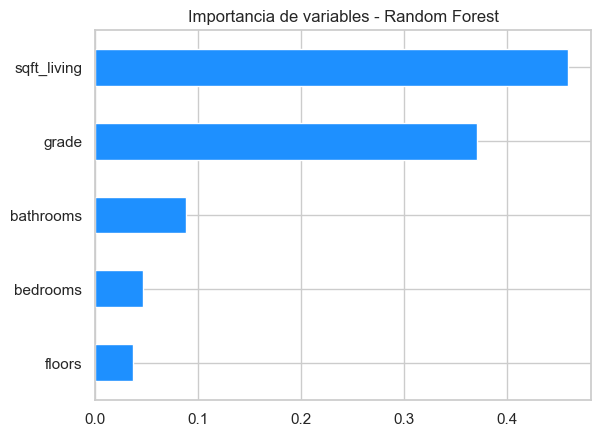

In [32]:
importancias = pd.Series(rf.feature_importances_, index=features)
importancias.sort_values().plot(kind='barh', color='dodgerblue')
plt.title("Importancia de variables - Random Forest")
plt.show()


- El modelo de Random Forest obtiene mejor R¬≤ y menor error que la regresi√≥n lineal.
- `sqft_living` y `grade` son las variables que m√°s explican el precio de las viviendas.
- Se recomienda probar otros modelos como XGBoost, o ajustar hiperpar√°metros de Random Forest.


## Optimizaci√≥n de Hiperpar√°metros ‚Äî GridSearchCV

In [35]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


In [36]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,              # 3-fold cross-validation
    n_jobs=-1,         # Usa todos los n√∫cleos disponibles
    scoring='r2',
    verbose=2
)


In [38]:
grid_search.fit(X_entreno, y_entreno)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Program Files\Python313\Lib\site-packages\sklearn\base.py", line 436, in _validate_pa

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [39]:
print("Mejores par√°metros encontrados:")
print(grid_search.best_params_)


Mejores par√°metros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Evaluar modelo optimizado:

In [ ]:
best_rf = grid_search.best_estimator_
mae_rf_opt, rmse_rf_opt, r2_rf_opt = evaluar_modelo(best_rf, X_prueba, y_prueba)

print(f"Random Forest Optimizado ‚Üí MAE: {mae_rf_opt:.2f}, RMSE: {rmse_rf_opt:.2f}, R2: {r2_rf_opt:.2f}")


## üìä Comparativa de rendimiento:

| Modelo                  | MAE     | RMSE     | R¬≤     |
|:------------------------|:---------|:----------|:---------|
| Regresi√≥n Lineal         | X.XX    | X.XX     | X.XX  |
| Random Forest            | X.XX    | X.XX     | X.XX  |
| Random Forest Optimizado | X.XX    | X.XX     | X.XX  |



In [40]:
# Predicciones del modelo optimizado
y_pred = best_rf.predict(X_test)


NameError: name 'best_rf' is not defined